# Conversioni tra bool e altri tipi

Il tipo bool viene automaticamente convertito in intero, quando serve:  `False` è equivalente a `0` e `True` è equivalente a 1.

In [ ]:
False + 45

In [ ]:
True + 45

Di converso, quasi tutti i tipi vengono convertiti in `bool` quando necessario, secondo queste regole:
  * tipo `int`:  il numero `0` diventa `False`, qualunque altro numero diventa `True`
  * tipo `float`: come `int`
  * tipo `str`: la stringa vuota `""` diventa `False`, tutto il resto diventa `True`
  
Conversioni simili valgono anche per altri tipi che vedremo in futuro.

In [1]:
if "ciao":
  print("a")
else:
  print("b")

a


# Valutazione degli operatori booleani
*(parzialmente trattato nella sezione Argomenti Avanzati 3.4 del libro di testo)*

Quando una espressione contiene `and` e `or` non è necessario calcolare tutte le sotto-espressioni. Ad esempio, se `x = True`, il risultato di `x or y` sarà sicuramente `True`, non è necessario calcolare `y`. Analogamente, se `x = False`, il risultato di `x and y` sarà sicuramente `False`.

In questi casi, Python evita di calcolare la sotto-espressione che non è necessaria. Si parla di **valutazione a corto-circuito**.

In [3]:
x = 0
x == 0 or 1/x == 1

True

Il risultato è `True` perchè `x` è uguale a 0. Notare che `1/x == 1` non viene calcolato. Se lo fosse, si genererebbe un errore di divisione per 0, come qui sotto:

In [5]:
1/x == 1

ZeroDivisionError: division by zero

In realtà, il comportamento degli operatori booleani è ancora più strano. Ad esempio.

In [1]:
"c" and "a"

'a'

Perché `"c" and "a"` restituisce `"a"` come risultato ? Per capire questa cosa e altre stranezze simili, bisogna esamonare la vera definizione degli operatori `and` e `or`.
  * `x and y`: se `x` si converte in `False`, il risultato è `x` altrimenti è `y`
  * `x or y`: se `x` si converte in `True`, il risultato è `x`, altrimenti è `y`

Se `x` ad `y` sono booleani, questo corrisponde alla definizione standard dei connettivi `and` e `or` in logica, ma se non sono booleani, si ottengono risultati strani.

Esaminiamo ad esempio l'espressione `"c" and a"`. Viene prima controllato il risultato della conversione di `"c"` in booleano. Siccome `"c"` non è la stringa nulla, esso corrisponde a `True`, quindi, in accordo alla definizione sopra il risultato è `"a"`.

In [2]:
1+1 or 1/0

2

Per quanto riguarda l'espressione `1+1 or "ciao"` qui sopra: `1+1` viene calcolato e convertito in booleano. Poiché 1+1=2 non è nullo, in booleano corrisponde a `True`. Per la definizione di sopra, il risultato è `2` e `1/0` non viene neanche calcolato.

Il motivo di questo strano comportamento di `and` e `or` è che, in certe sistuazioni, può tornare comodo.

# L'espressione condizionale
*(sezione Argomenti Avanzati 3.1 del libro di testo)*

Spesso capita di avere codice di queso tipo:
```python
if condizione: 
    x = v1
else:
    x = v2
```
in cui si assegna il valore `v1` o `v2` alla variabile `x` a seconda del risultato di `condizione`.

Un modo alternativo di scrivere questo pezzo di codice è usare l'*espressione condizionale* (che appunto come dice il nome, è una espressione e non una istruzione). Ha la forma:
```python
v1 if condizione else v2
```
I risultato di questa espressione è `v1` se condizione è `True` e `v2` se condizione è `False`.

In [3]:
42 if 2 == 2 else 33

42

In [4]:
42 if 2 == 3 else 33

33

È possibile anche mettere in cascata varie espressione condizionali, come nell'esempio che segue.

In [6]:
mese = 2
"gennaio" if mese == 1 else "febbraio" if mese ==2 else "marzo" if mese == 3 else "altro mese"

'febbraio'

Una espressione condizionale restituisce un risultato, esattamente come l'operazione + esegue la somma di due numeri e restituice un risultato. Col risultato possiamo farci quello che vogliamo: assegnarlo ad una variabile, stamparlo, darlo come argomento ad un metodo. Ad esempio, il seguente frammento di codice assengna all variabile `nome` il valore `Dumbo` se la variabile `numero_zampe` è 4, altrimenti assegna il valore `nemo`.

In [1]:
numero_zampe = 4
nome = "Dumbo" if numero_zampe == 4 else "Nemo"
print(nome)

Dumbo


**ATTENZIONE**

Scrivere 
```python
nome = "Dumbo" if numero_zampe == 4 else nome = "Nemo"
```
è sbagliato è genera un errore a tempo di compilazione. Questo perché l'espressione condizionale non sceglie tra eseguire una istruzione o eseguirne un'altra (quello lo fa l'*istruzione condizionale*) ma tra restituire un valore  restituirne un altro. Le due alternative, quella prima di `if` e quella dopo di `else`, non possono essere istruzioni, ma solo valori (o altre espressoni).

In particolare potete pensare che nella istruzione
```python
nome = "Dumbo" if numero_zampe == 4 else "Nemo"
```
ci siano delle parentesi implicite e che quindi l'istruzione si legga come:
```python
nome = ("Dumbo" if numero_zampe == 4 else "Nemo")
```

---

**Esercizio**

Modificare il programma per determinare il colore di una casella della scacchiera visto nella lezione scorsa, in moda da utilizzare l'*espressione condizionale* invece dell'*istruzione condizionale*

*Soluzione*

Vedi `programma_231019_1_scacchiera.py`.

---

# Le f-stringhe

L'istruzione `print` standard non consente di formattare l'output in maniera molto raffinata. Ad esempio, se la variabile `x` contiene un prezzo in euro, vorremmo stamparlo usando sempre due cifre dopo la virgola.

In [7]:
x = 2.10
print(x)  # vorremmo stampre 2.10, ma in realtà stampa 2.1

2.1


Se abbiamo molti numeri da stampare uno dopo l'altro, vorremmo essere in grado di allinearli tutti verso destra. Ad esempio:
```python
print(355)
print(1)
print(-45)
```
vorremmo che stampasse
```
355
  1
 -4
```
e invece stampa
```
355
1
-4
```
perché allinea tutto a sinistra.

In [8]:
print(355)
print(1)
print(-4)

355
1
-4


Esiste vari modi in Python per formattare l'output in maniera corretta. Il vostro libro vi spiega un metodo un po' obsoleto basato nella Sezione 2.5.3. Qui vi spiego invece l'uso delle f-stringhe.

Una *f-stringa* è una stringa che inizia con una lettera `f` fuori dalle virgolette (`f` sta per formatted)

In [9]:
f"Ciao sono una f-stringa"

'Ciao sono una f-stringa'

All'apparenza la `f` davanti sembra inutile, ma se le f-stringhe contengono una espressione tra parentesi graffa, questa espressione viene calcolata e il risultato sostituito nella stringa risultante.

In [10]:
x = 2
y = 4.5

In [11]:
f"Ecco il numero {x+2} e {y-4}"

'Ecco il numero 4 e 0.5'

Notare che nelle stringhe normali tutto ciò non succede.

In [12]:
"Ecco il numero {x+2} e {y-4}"

'Ecco il numero {x+2} e {y-4}'

Ecco altri esempi:

In [16]:
f"Ciao {abs(5-6)}"

'Ciao 1'

In [17]:
nome="Michele"
f"Ciao {nome}"

'Ciao Michele'

Quindi le f-stringhe sono un metodo per inserire espressioni (tipicamente nomi di variabili) all'interno di una stringa. La cosa interessante per i nostri scopi è che, sempre dentro le graffe, è possibile specificare come formattare il risultato dell'espressione prima di inserirla nella stringa. Per far ciò, dopo l'espressione, si inserisce il carattere di due punti `:` e poi si specifica il formato con [apposito mini-linguaggio](https://docs.python.org/3/library/string.html#formatspec).

La cosa più semplice che si può fare è, dopo i due punti, inserire un numero intero. Questo è il numero di caratteri che l'espressione occuperà nella stringa. Nell'esempio che segue, la variabile `x` viene rimpiazzata col suo valore che è 2, ma a questo 2 vengono aggiunti altri 9 spazi in modo da occupare comunque il numero di caratteri specificato, che è 10.

Ad esempio:

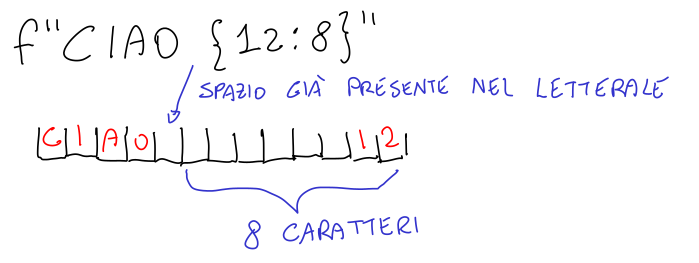

In [13]:
f"Ecco il numero {x:10} che occupa 10 spazi ed è allineato a destra"

'Ecco il numero          2 che occupa 10 spazi ed è allineato a destra'

Si noti che il numero, all'interno dello spazio di 10 caratteri che gli è stato dedicato, è stato allineato a destra. Le stringhe, invece, vengono allineate a sinistra.

In [18]:
f"Mi chiamo {nome:20}, ciao"

'Mi chiamo Michele             , ciao'

Per i `float`,è possibile anche specificare il numero di caratteri che vogliamo dopo la virgola, come nel seguente esempio.

In [19]:
f"Ecco il numero {y:10.2f} che occupa 10 spazi, di cui 2 per le cifre decimali"

'Ecco il numero       4.50 che occupa 10 spazi, di cui 2 per le cifre decimali'

Si può anche specificare solo la precisione senza lo spazio che il numero deve occupare.

In [21]:
f"Ecco il numero {y:.2f} con 2 cifre decimali"

'Ecco il numero 4.50 con 2 cifre decimali'

Infine, si possono allineare a sinistra anche i numeri mettendo il simbolo `<` prima della lunghezza del campo.

In [22]:
f"Ecco il numero {y:<10.2f} come sopra ma allineato a sinistra"

'Ecco il numero 4.50       come sopra ma allineato a sinistra'

L'elenco di tutto ciò che è possibile specificare dopo i due punti è molto lungo, e vi rimando alla documentazione sul [mini-linguaggio per la specifica della formattazione](https://docs.python.org/3/library/string.html#formatspec).

---

**Esercizio P2.5**

Scrivere un programma che chiede all'utente due numeri interi e visualizza:

   * la somma
   * la differenza
   * il prodotto
   * il valore medio
   * la distanza (cioè il valore assoluto della differenze)
   *  il valore massimo
   * il valore minimo

Far sì che l'output sia allinato come segue:

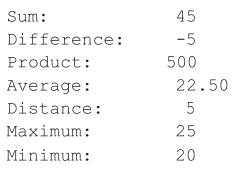

*Soluzione*

Vedere `programma_231019_2_allineamento.py` e `programma_231019_2_allineamento_bis.py`

---

## Domanda dagli studenti

**Mi è stato chiesto durante la lezione se, invece di usare le f-stringhe, è possibile utilizzare il carattere tabulazione.**

La risposta secca a questa domanda è no, ma ne approfitto per spiegare cosa è il carattere tabulazione e perché non è adatto a risolvere i problemi di formattazione del testo.

Il carattere di tabulazione (da ora in poi chiamato semplicemente HT per *horizontal tabulation*) ha codice ASCII 9, e può essere inserito in una stringa Python con il codice di escape `\t`. Quando il carattere HT viene inviato in stampa, il suo effetto è spostare il cursore avanti fino al *tab stop* successivo. La posizione di questi tab stop dipendono dal sistema operativo, ma in generale si trovano in tutte le colonne multiple di 8. Pertanto, il comando
```python
print("aa\tbb")
```
stamparà due `a`, poi 6 spazi in modo da raggiungere la colonna numero 8, quindi due `b`.

Invece 
```python
print("aaaa\tbb")
```
Invece stamparà quattro `a`, poi 4 spazi in modo da raggiungere la colonna numero 8, quindi due `b`.

Vediamo un esempio un po' più complesso:

In [34]:
print("\t",1,"\tb")
print("a\t",10,"\tb")
print("aa\t",20,"\tb")
print("aa      ",300,"\tb")

	 1 	b
a	 10 	b
aa	 20 	b
aa       300 	b


Come si vede nell'esempio di sopra, abbiamo usato la tabulazione per allineare tutti i numeri e le lettere `b`. Tuttavia, l'uso delle tabulazioni ha enormi limitazioni:
  * non consente di specificare quanto spazio riservare per le varie informazioni, i tab stop sono in posizione fissa;
  * non consente di allineare i valori a destra: i numeri 1, 10, 20, etc.. sono tutti stati allineati a sinistra;
  * si richia l'incompatibilità tra sistemi che usano posizioni differenti per i tab stop.

Per questi motivi, è meglio non usare il carattere tabulazione. Si tratta più che altro di un retaggio delle vecchie macchine da scrivere.

Diverso è il discorso per le tabulazioni nei word-processor, come LibreOffice Writer o Microsoft Word. Qui le tabulazioni sono molto più sofisticate: è possibile configurare la posizione dei tab stop, decidere che tipo di allineamento usare per ognuno di essi, etc... Ma nessuna di queste funzionalità è presente quando si usa il carattere di tabulazione in Python.

# Assegnazione aumentata
*(sezione Argomenti Avanzati 2.2 del libro di testo)*

Le istruzioni di assegnazione aumentata sono la combinazione, in una unica istruzione, di una istruzione di assegnamento e un operatore binario.

Ad esempio `v += espressione` calcola la somma della variabile `v` con il valore di `espressione`, e assegna il risultato a `v`. In altre parole, equivale a `v = v + espressione`. Analogamente esistono `-=`, `*=`, etc...

In [ ]:
x = 5
x += 3
x

Per chi ha precedenti esperienze di progammazione con C, Java o simili, si noti che Python non supporta invece le operazioni di autoincrement `++` e autodecremento `--`. Ad esempio l'istruzione:
```java
x++
```
non è valida, ma può essere rimpiazzata da
```python
x += 1
```